## Employee Data Analysis Project

### Project Objective
The objective of this project is to analyze the employee dataset to uncover insights related to employee performance, demographics, and training outcomes. The analysis will utilize various SQL queries and visualizations to provide actionable recommendations for improving employee engagement and performance across different departments and regions.

### Importing Necessary Libraries

In [1]:
import pandas as pd

In [16]:
import sqlite3

In [18]:
import matplotlib.pyplot as plt

### Load the Employee Dataset

In [3]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL\archive\employee_dataset.csv")

### Set up SQLite Database

In [23]:
conn = sqlite3.connect('employee_analysis.db')

### Load the DataFrame into a SQL table

In [28]:
data.to_sql('employee', conn, if_exists='replace', index=False)

17417

### Check the first few rows of the table

In [31]:
pd.read_sql('SELECT * FROM employee LIMIT 5', conn)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


###  Check for NaN values in 'previous_year_rating'

In [37]:
data['previous_year_rating'].isna().sum()

1363

###  Impute NaN values with the median of the column

In [147]:
median_rating = data['previous_year_rating'].median()

In [168]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(median_rating)

### Confirm no missing vlues

In [149]:
data['previous_year_rating'].isna().sum()

0

### 1. Employee Distribution by Department

##### SQL query for employee distribution by department

In [57]:
query = '''
SELECT department, COUNT(employee_id) AS employee_count
FROM employee
GROUP BY department
ORDER BY employee_count DESC;
'''

####  Execute the query and load the result into a DataFrame

In [61]:
employee_distribution = pd.read_sql(query, conn)

#### Display the result

In [69]:
employee_distribution

,department,employee_count
0,Sales & Marketing,5458
1,Operations,3524
2,Procurement,2240
3,Technology,2199
4,Analytics,1697
5,HR,833
6,Finance,802
7,R&D,332
8,Legal,332


#### Visualization

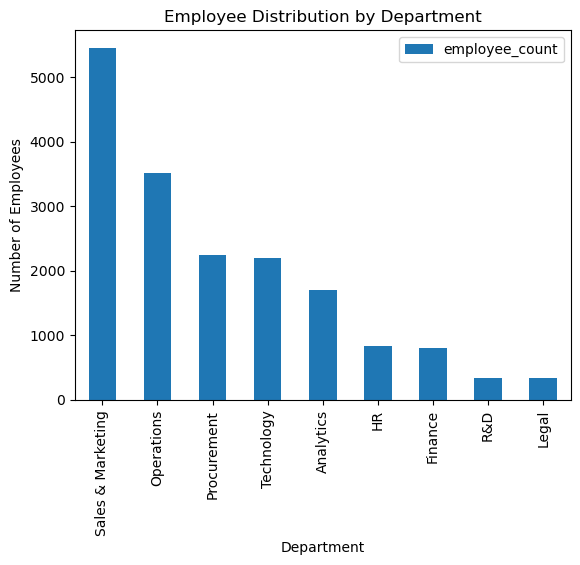

In [66]:
employee_distribution.plot(kind='bar', x='department', y='employee_count', title='Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

### 2. Average Age of Employees by Department

#####  SQL query for average age of employees by department

In [77]:
query = '''
SELECT department, AVG(age) AS average_age
FROM employee
GROUP BY department
ORDER BY average_age DESC;
'''

##### Execute the query and load the result into a DataFrame

In [81]:
average_age_by_department = pd.read_sql(query, conn)

###### Display the result

In [83]:
average_age_by_department

,department,average_age
0,Procurement,36.166964
1,Operations,36.154086
2,Technology,35.034106
3,Sales & Marketing,34.627153
4,HR,34.248499
5,Legal,33.750000
6,R&D,32.885542
7,Finance,32.602244
8,Analytics,32.405421


#####  Visualization

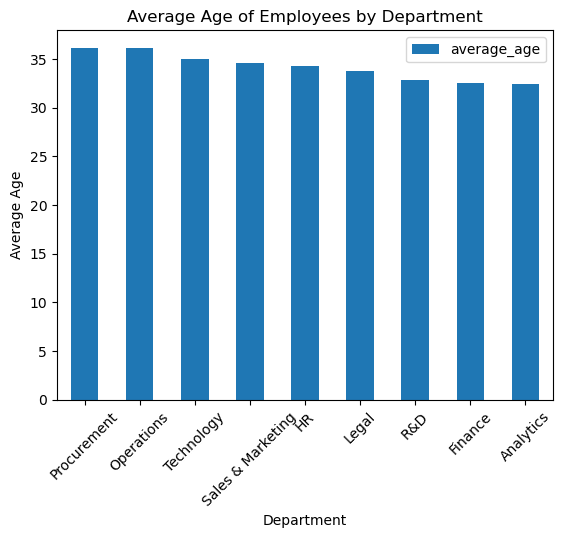

In [87]:
average_age_by_department.plot(kind='bar', x='department', y='average_age', title='Average Age of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

### 3. Gender Distribution Across Regions

#####  SQL query for gender distribution across regions

In [93]:
query = '''
SELECT region, gender, COUNT(employee_id) AS count
FROM employee
GROUP BY region, gender
ORDER BY region, count DESC;
'''

##### Execute the query and load the result into a DataFrame

In [97]:
gender_distribution = pd.read_sql(query, conn)

##### Display the result

In [100]:
gender_distribution 

,region,gender,count
0,region_1,m,132
1,region_1,f,42
2,region_10,m,148
3,region_10,f,61
4,region_11,m,316
...,...,...,...
63,region_7,f,450
64,region_8,m,139
65,region_8,f,70
66,region_9,m,122


##### Pivot the data for better visualization

In [103]:
gender_pivot = gender_distribution.pivot(index='region', columns='gender', values='count')

#####  Visualization

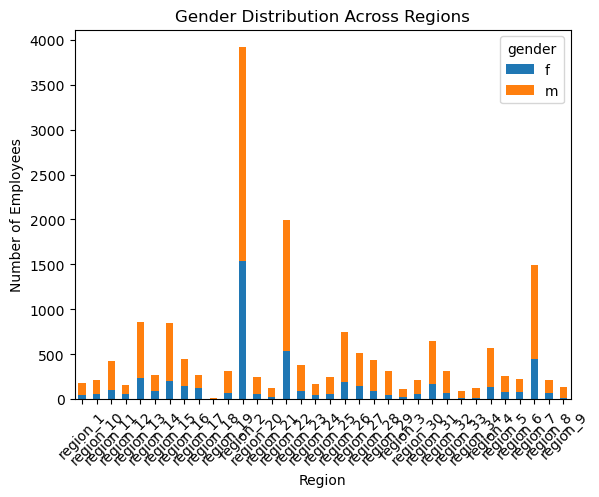

In [106]:
gender_pivot.plot(kind='bar', stacked=True, title='Gender Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

### 4. Impact of Education Level on Average Training Scores

##### SQL query for impact of education level on average training scores

In [110]:
query = '''
SELECT education, AVG(avg_training_score) AS average_training_score
FROM employee
GROUP BY education
ORDER BY average_training_score DESC;
'''

##### Execute the query and load the result into a DataFrame

In [113]:
training_score_by_education = pd.read_sql(query, conn)

##### Display the result

In [116]:
training_score_by_education

,education,average_training_score
0,Below Secondary,65.902098
1,Masters & above,64.134270
2,Bachelors,63.033336
3,None,58.286641


##### Visualization:

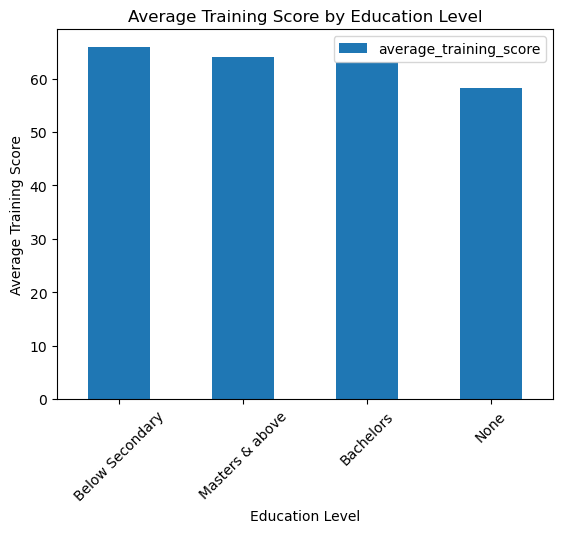

In [119]:
training_score_by_education.plot(kind='bar', x='education', y='average_training_score', title='Average Training Score by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.show()

### 5. Analysis of KPI Achievement by Length of Service

##### SQL query for KPI achievement by length of service

In [123]:
query = '''
SELECT length_of_service, AVG(KPIs_met_more_than_80) AS kpi_achievement_rate
FROM employee
GROUP BY length_of_service
ORDER BY length_of_service;
'''

##### Execute the query and load the result into a DataFrame

In [126]:
kpi_by_service_length = pd.read_sql(query, conn)

##### Display the result

In [129]:
kpi_by_service_length

,length_of_service,kpi_achievement_rate
0,1,0.365821
1,2,0.385864
2,3,0.395731
3,4,0.374653
4,5,0.386625
5,6,0.389446
6,7,0.385787
7,8,0.289389
8,9,0.305868
9,10,0.298422


##### Visualization

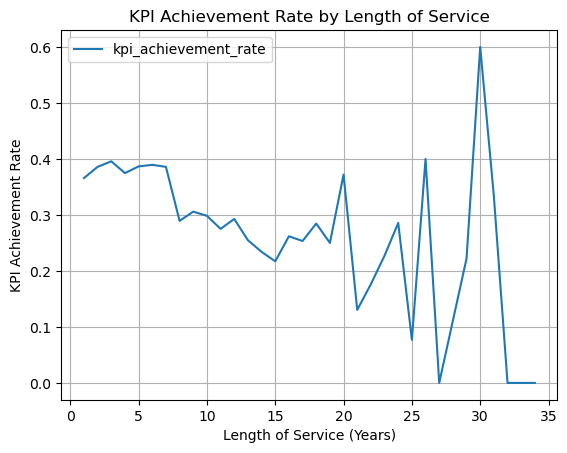

In [132]:
kpi_by_service_length.plot(kind='line', x='length_of_service', y='kpi_achievement_rate', title='KPI Achievement Rate by Length of Service')
plt.xlabel('Length of Service (Years)')
plt.ylabel('KPI Achievement Rate')
plt.grid(True)
plt.show()

### 6. Department-wise Analysis of Employees with Awards

#####  SQL query for department-wise analysis of employees with awards

In [195]:
query = '''
SELECT department, SUM(awards_won) AS total_awards, COUNT(employee_id) AS total_employees,
       (SUM(awards_won) * 100.0 / COUNT(employee_id)) AS award_percentage
FROM employee
GROUP BY department
ORDER BY award_percentage DESC;
'''

#####  Execute the query and load the result into a DataFrame

In [202]:
awards_by_department = pd.read_sql(query, conn)

#####  Display the result

In [204]:
awards_by_department

,department,total_awards,total_employees,award_percentage
0,Technology,58,2199,2.637563
1,Procurement,57,2240,2.544643
2,Analytics,43,1697,2.533883
3,Operations,89,3524,2.525539
4,Sales & Marketing,120,5458,2.198608
5,Finance,15,802,1.870324
6,Legal,6,332,1.807229
7,HR,14,833,1.680672
8,R&D,5,332,1.506024


##### Visualization:

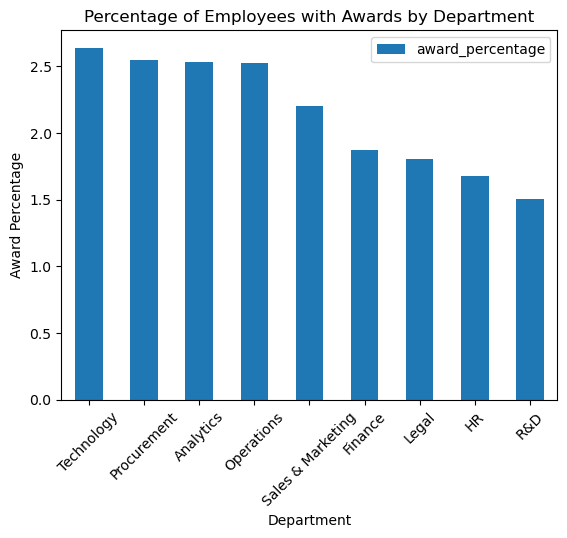

In [207]:
awards_by_department.plot(kind='bar', x='department', y='award_percentage', title='Percentage of Employees with Awards by Department')
plt.xlabel('Department')
plt.ylabel('Award Percentage')
plt.xticks(rotation=45)
plt.show()

### 7. Impact of Number of Trainings on KPI Achievement

##### SQL query for number of trainings vs. KPI achievement

In [211]:
query = '''
SELECT no_of_trainings, AVG(KPIs_met_more_than_80) AS average_kpi_achievement
FROM employee
GROUP BY no_of_trainings
ORDER BY no_of_trainings;
'''

##### Execute the query and load the result into a DataFrame

In [214]:
trainings_vs_kpi = pd.read_sql(query, conn)

##### Display the result

In [217]:
trainings_vs_kpi

,no_of_trainings,average_kpi_achievement
0,1,0.367684
1,2,0.333333
2,3,0.306122
3,4,0.204380
4,5,0.307692
5,6,0.000000
6,7,0.166667
7,8,0.500000
8,9,0.500000


##### Visualization

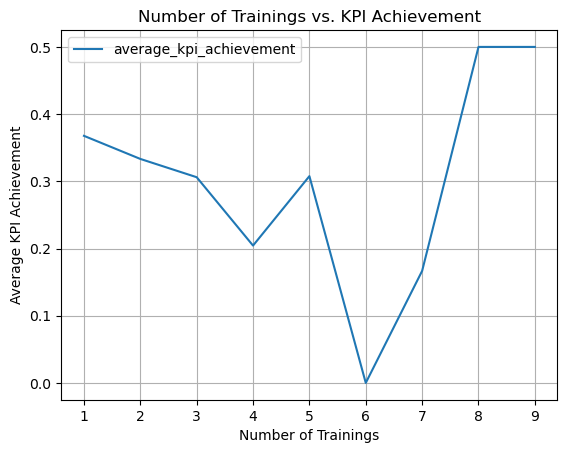

In [221]:
trainings_vs_kpi.plot(kind='line', x='no_of_trainings', y='average_kpi_achievement', title='Number of Trainings vs. KPI Achievement')
plt.xlabel('Number of Trainings')
plt.ylabel('Average KPI Achievement')
plt.grid(True)
plt.show()

### 8. KPI Achievement Rate by Region

#####  SQL query for KPI achievement rate by region

In [225]:
query = '''
SELECT region, AVG(KPIs_met_more_than_80) AS kpi_achievement_rate
FROM employee
GROUP BY region
ORDER BY kpi_achievement_rate DESC;
'''

#####  Execute the query and load the result into a DataFrame

In [228]:
kpi_by_region = pd.read_sql(query, conn)

#####  Display the result

In [231]:
kpi_by_region

,region,kpi_achievement_rate
0,region_4,0.476357
1,region_3,0.445455
2,region_22,0.411558
3,region_17,0.399254
4,region_28,0.397674
5,region_23,0.385638
6,region_7,0.380376
7,region_8,0.377990
8,region_29,0.366883
9,region_2,0.360898


#####  Visualization

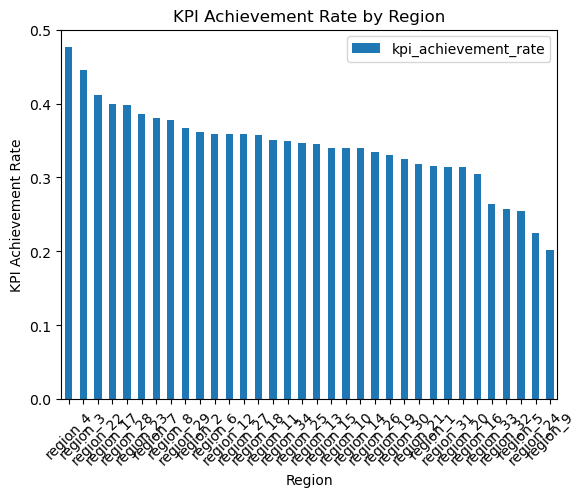

In [240]:
kpi_by_region.plot(kind='bar', x='region', y='kpi_achievement_rate', title='KPI Achievement Rate by Region')
plt.xlabel('Region')
plt.ylabel('KPI Achievement Rate')
plt.xticks(rotation=45)
plt.show()

### 9. Correlation Between Awards Won and Length of Service

##### SQL query for awards won and length of service

In [238]:
query = '''
SELECT length_of_service, SUM(awards_won) AS total_awards
FROM employee
GROUP BY length_of_service
ORDER BY length_of_service;
'''

#### Execute the query and load the result into a DataFrame

In [243]:
awards_vs_service_length = pd.read_sql(query, conn)

##### Display the result

In [246]:
awards_vs_service_length

,length_of_service,total_awards
0,1,36
1,2,65
2,3,65
3,4,57
4,5,49
5,6,38
6,7,48
7,8,11
8,9,13
9,10,7


##### Visualization

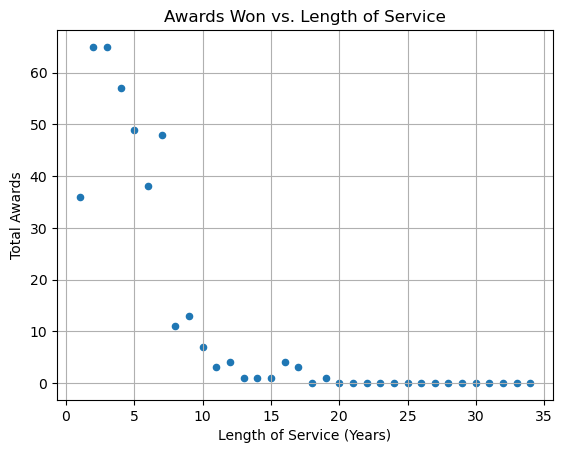

In [249]:
awards_vs_service_length.plot(kind='scatter', x='length_of_service', y='total_awards', title='Awards Won vs. Length of Service')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Total Awards')
plt.grid(True)
plt.show()

### 10. Awards Won by Department

#####  SQL query for total awards won by department

In [253]:
query = '''
SELECT department, SUM(awards_won) AS total_awards
FROM employee
GROUP BY department
ORDER BY total_awards DESC;
'''

##### Execute the query and load the result into a DataFrame

In [256]:
awards_by_department = pd.read_sql(query, conn)

#####  Display the result

In [259]:
awards_by_department

,department,total_awards
0,Sales & Marketing,120
1,Operations,89
2,Technology,58
3,Procurement,57
4,Analytics,43
5,Finance,15
6,HR,14
7,Legal,6
8,R&D,5


#####  Visualization

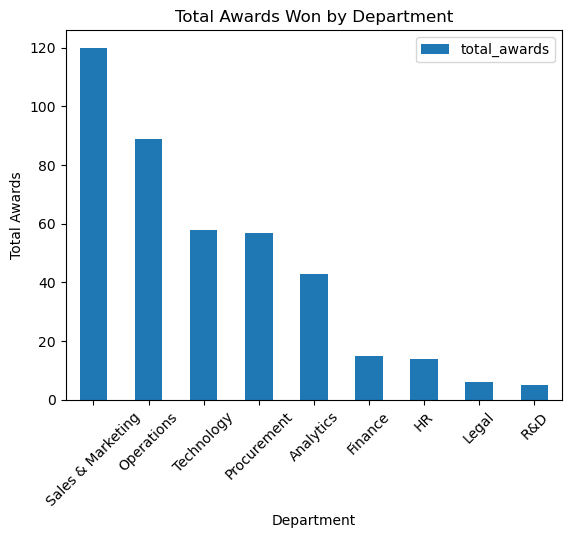

In [262]:
awards_by_department.plot(kind='bar', x='department', y='total_awards', title='Total Awards Won by Department')
plt.xlabel('Department')
plt.ylabel('Total Awards')
plt.xticks(rotation=45)
plt.show()

### 11.  Average Training Score by Recruitment Channel

#####  SQL query for average training score by recruitment channel

In [267]:
query = '''
SELECT recruitment_channel, AVG(avg_training_score) AS average_training_score
FROM employee
GROUP BY recruitment_channel
ORDER BY average_training_score DESC;
'''

##### Execute the query and load the result into a DataFrame

In [272]:
training_score_by_recruitment_channel = pd.read_sql(query, conn)

##### Display the result

In [275]:
training_score_by_recruitment_channel

,recruitment_channel,average_training_score
0,referred,64.507886
1,other,63.403959
2,sourcing,62.816846


#####  Visualization

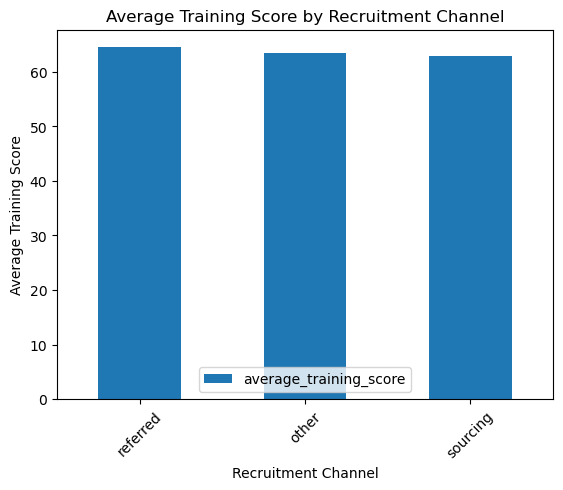

In [278]:
training_score_by_recruitment_channel.plot(kind='bar', x='recruitment_channel', y='average_training_score', title='Average Training Score by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.show()

### 12.Average Training Score of Employees with More Than 3 Years of Service

#####  SQL query to find average training score of employees with more than 3 years of service

In [282]:
query = '''
SELECT AVG(avg_training_score) AS average_training_score
FROM employee
WHERE length_of_service > 3;
'''


##### Execute the query and load the result into a DataFrame

In [285]:
avg_training_score_long_service = pd.read_sql(query, conn)

##### Display the result

In [288]:
avg_training_score_long_service

,average_training_score
0,63.122408


### 13. Average Training Score by Gender

#####  SQL query for average training score by gender

In [296]:
query = '''
SELECT gender, AVG(avg_training_score) AS average_training_score
FROM employee
GROUP BY gender
ORDER BY average_training_score DESC;
'''

##### Execute the query and load the result into a DataFrame

In [299]:
training_score_by_gender = pd.read_sql(query, conn)

##### Display the result

In [302]:
training_score_by_gender

,gender,average_training_score
0,f,63.680776
1,m,62.967273


##### Visualization

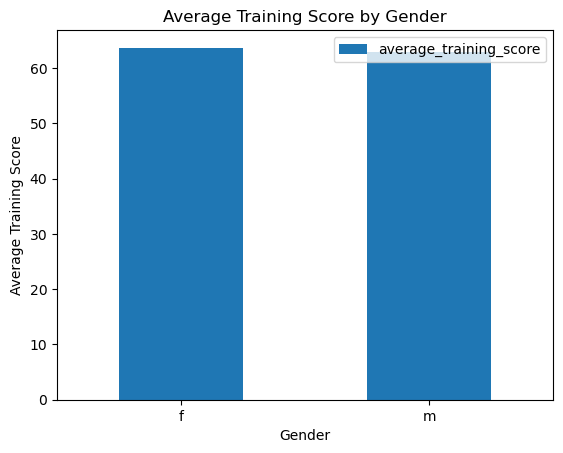

In [307]:
training_score_by_gender.plot(kind='bar', x='gender', y='average_training_score', title='Average Training Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Training Score')
plt.xticks(rotation=0)
plt.show()